## K-Means from scratch

In [2]:
#import packages
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

### Generate data
Here I am generating a 1000x2 dataframe that inherently has 5 clusters.

In [4]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=7)
X = pd.DataFrame(X, columns=['col1', 'col2'])
X.head()

,col1,col2
0,-0.288390,-9.911921
1,9.056103,1.020104
2,-5.440328,0.680865
3,-1.976588,-10.113697
4,-9.037127,3.384706


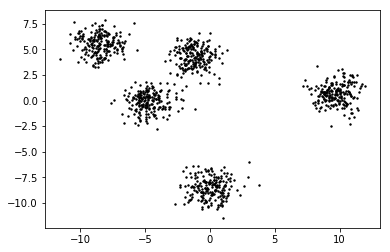

In [5]:
plt.scatter(X.col1, X.col2, s=2, color ='black')

In [6]:
def dist(a,b, axis=None):
    '''
    Computes the Euclidean distance between arrays a and b.
    '''
    return np.linalg.norm(a-b, axis = axis)

We first normalise the data. This is done to prevent a particular column for impacting the cluster formation more than the others.

In [7]:
s = StandardScaler()
X = s.fit_transform(X)

### Define the KMeans class
It has 3 functions:
1. __init__() constructor that initialises the attributes
2. fit() has the core logic that computes the centroids and cluster assignment
3. plot() that visualises the clusters

In [17]:
class KMeans():
    def __init__(self, k, threshold, max_iter):
        #When the difference between the old and new centroids is less than the threshold value, 
        #we stop the iterations.
        #max_iter specifies the maximum number of times the algorithm can iterate 
        #trying to optimize the centroid values.
        self.k = k
        self.threshold = threshold
        self.max_iter = max_iter

    def fit(self, X):
        self.X = X
        #randomly assigning the k centroids initially
        self.centroids = self.X[random.sample(range(len(self.X)), self.k)]
        centroids_new = self.centroids.copy()
        print(self.centroids)
        for it in range(self.max_iter):
            #Defining a dictionary assigned_cluster which will keep all the 
            #data points of all the clusters individually
            self.assigned_cluster = {i: [] for i in range(self.k)}
            for row in range(len(self.X)):
                # for a given data point we get to know which cluster it belongs according
                # to the distance function.
                assigned_idx = np.argmin(
                    dist(self.X[row, :].reshape(1, 2), self.centroids, axis=1))
                #assigned cluster keeps track of the data points to which cluster
                # it belo
                self.assigned_cluster[assigned_idx].append(row)

            for i in range(self.k):
                centroids_new[i] = np.mean(
                    self.X[self.assigned_cluster[i]], axis=0)


#             if dist(self.centroids, centroids_new) < self.threshold:
#                 centroids = new_centroids
#                 break;
            self.centroids = centroids_new
        print(f"Stopping after {it} iterations.")

    def plot(self):
        colours = cm.rainbow(np.linspace(0, 1, self.k))
        fig, ax = plt.subplots()
        for i in range(self.k):
            ax.scatter(
                self.X[self.assigned_cluster[i], 0],
                self.X[self.assigned_cluster[i], 1],
                color=colours[i],
                s=2)
        plt.scatter(
            self.centroids[:, 0],
            self.centroids[:, 1],
            marker='*',
            color='black')

In [18]:
kmeans = KMeans(k=5, max_iter=1000, threshold=0.0001)

In [19]:
kmeans.fit(X)

[[-0.06399152 -1.35343251]
 [-0.7376595  -0.18803296]
 [-1.24501647  0.99129743]
 [ 0.15874941  0.87242957]
 [ 0.27937285 -1.84873361]]
Stopping after 999 iterations.


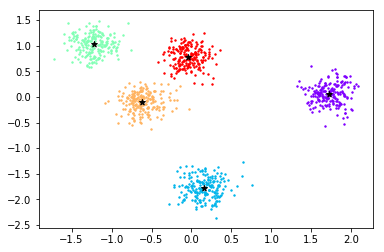

In [12]:
kmeans.plot()